In [5]:
# Step 1: Install the Google Gemini AI SDK
!pip install -q google-generativeai

In [6]:
# API KEY
import os
os.environ["GOOGLE_API_KEY"] = "ENTER API KEY"

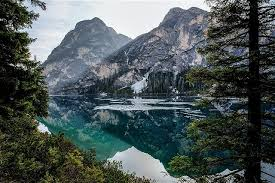

In [7]:
# displaying image
from PIL import Image
from io import BytesIO
import base64

image = Image.open("/content/image_1.jpeg")
image

# Multi Model Input (image, 'Prompt')

#Generating a Story About The Image

In [8]:
# multi model input
# generating a story about the image

from google import genai

client = genai.Client()

image_1 = Image.open("/content/image_1.jpeg")
response_1 = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[image_1, "Write an story about the image in 100 words"]
)

print(response_1.text)

Elara pushed through the last thicket of pines, her breath catching. Before her lay a scene stolen from a dream. Emerald waters mirrored the colossal peaks, their snow-dusted faces duplicated with breathtaking clarity. A sliver of ice still clung to the edges, a testament to spring's lingering chill. The air, crisp and pine-scented, hummed with an ancient silence.

She felt small, yet profoundly connected to something immense. This hidden gem, nestled deep within the mountains, promised solace. She settled on a mossy rock, ready to absorb its tranquil power, knowing she'd carry this view in her heart forever.


#Image Generation

In [9]:
"""
1. config: generate_content
2. Response Modality: Response modality means the type of output (like text, image, audio, video, or code) the model generates.
It tells the system in what format the response should be produced, and by default, Gemini’s response modality is text.
"""
from google.genai import types

response_2 = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=["Make an image of a white mansion with garden area and a pool with two black horses in front"],
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE'])
)

In [10]:
response_2

GenerateContentResponse(
  automatic_function_calling_history=[],
  candidates=[
    Candidate(
      content=Content(
        parts=[
          Part(
            text="""I will generate an image of a grand white mansion featuring elegant architectural details. The mansion will be surrounded by a lush green garden with colorful flowers and manicured hedges. In the foreground, a sparkling blue pool will be visible, and two majestic black horses will be standing gracefully in front of the mansion, adding a touch of elegance and grandeur to the scene.

"""
          ),
          Part(
            inline_data=Blob(
              data=<... Max depth ...>,
              mime_type=<... Max depth ...>
            )
          ),
        ],
        role='model'
      ),
      finish_reason=<FinishReason.STOP: 'STOP'>,
      index=0
    ),
  ],
  model_version='gemini-2.0-flash-preview-image-generation',
  response_id='Nbn_aNf3BfCvmtkP3MKHyQw',
  sdk_http_response=HttpResponse(
    headers=<dict 

In [11]:
# printing text
response_2.candidates[0].content.parts[0].text

'I will generate an image of a grand white mansion featuring elegant architectural details. The mansion will be surrounded by a lush green garden with colorful flowers and manicured hedges. In the foreground, a sparkling blue pool will be visible, and two majestic black horses will be standing gracefully in front of the mansion, adding a touch of elegance and grandeur to the scene.\n\n'

In [12]:
# storing binary image in data_1 variable
data_1 = response_2.candidates[0].content.parts[1].inline_data.data

In [13]:
# Writes the image data from 'data' into a new file named "bmw.png"
with open("mansion.png", 'wb') as f:
  f.write(data_1)

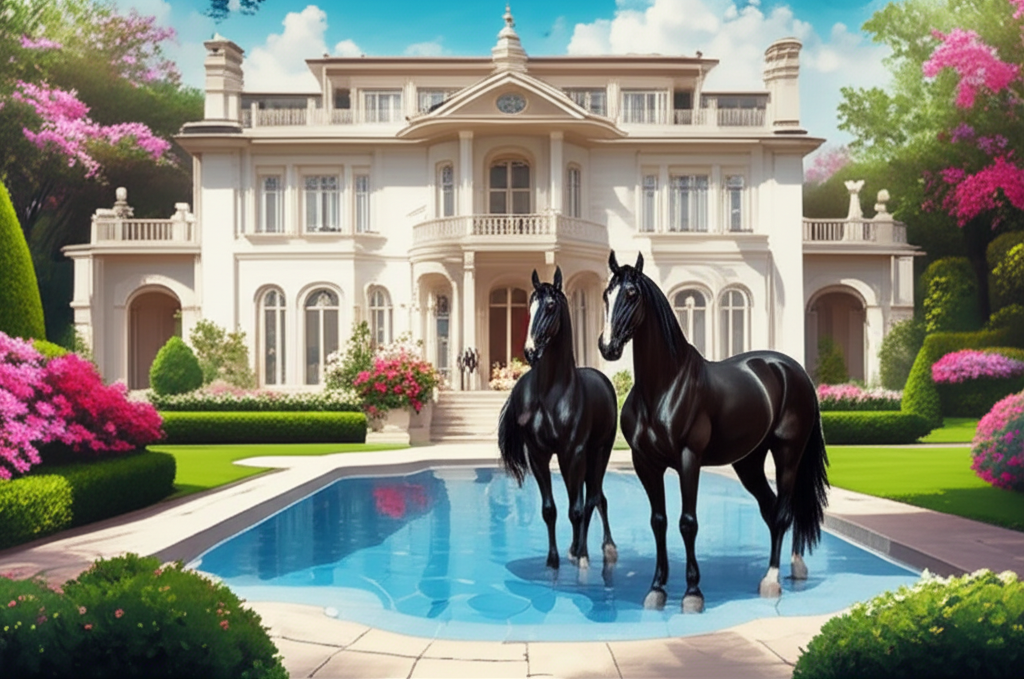

In [14]:
# displaying generated image 'bmw.png'
from IPython.display import display
image_2= Image.open('/content/mansion.png')
display(image_2)

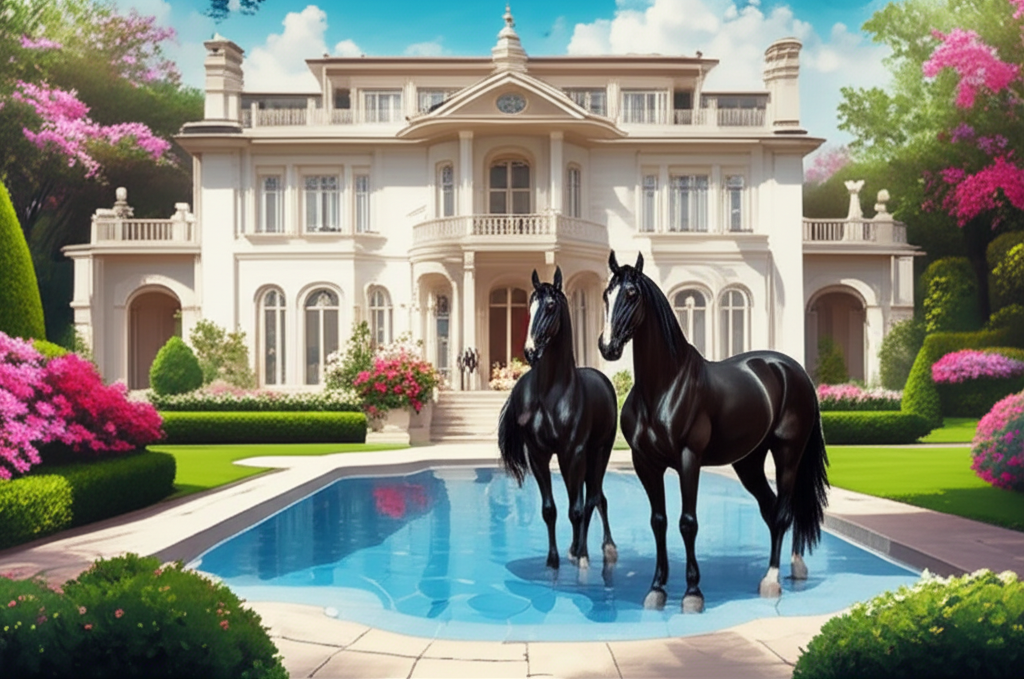

In [15]:
# displaying image
import PIL.Image
image_3 = PIL.Image.open("/content/mansion.png")
image_3

#Image Editing

In [16]:
"""
1. image edit
2. input: image + text
3. output: edited image
"""

# initialize the GenAI Client
client = genai.Client()

# Generate content using the Gemini image generation previous model
response_3 = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=[image_3, "Edit the mansion image with lawn and sports car in front"],
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE'])
)

In [17]:
# storing binary image in data_2 variable
data_2 = response_3.candidates[0].content.parts[0].inline_data.data

In [18]:
# Writes the image data from 'data' into a new file named "bmw_edited.png"
with open("mansion_edited.png", 'wb') as f:
  f.write(data_2)

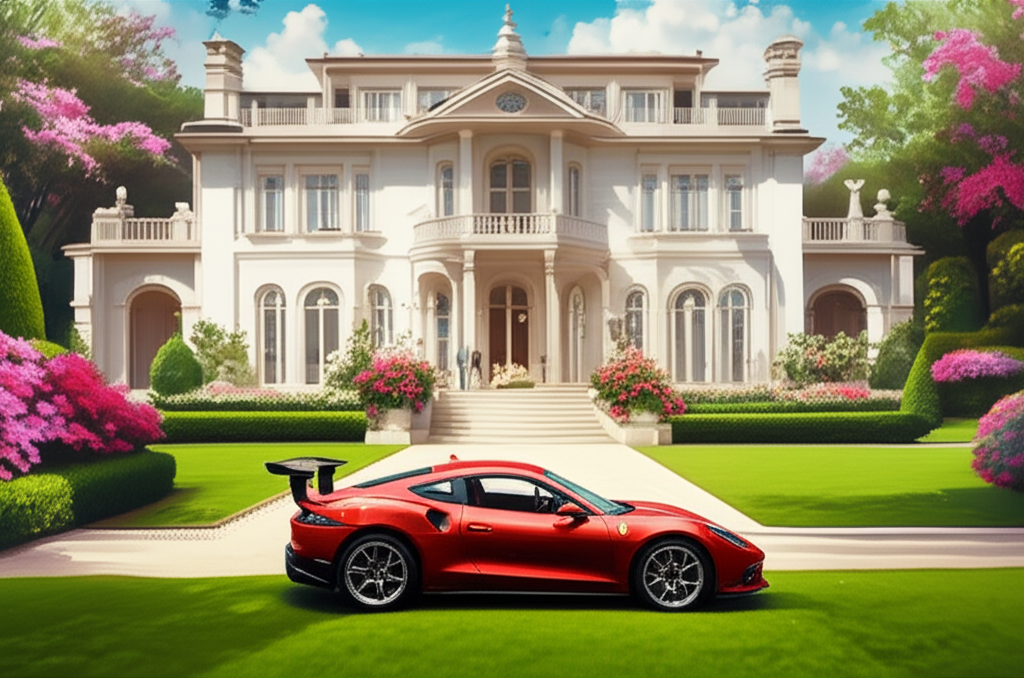

In [19]:
# displaying generated image 'bmw_edited.png'
from IPython.display import display
image_4 = Image.open('/content/mansion_edited.png')
display(image_4)